# Simple example

In [1]:
from stan2tfp import stan2tfp, sampling
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
stan_code = """
data {
  int<lower=0> J;
  real y[J];
  real<lower=0> sigma[J];
}

parameters {
  real mu;
  real<lower=0> tau;
  vector[J] theta_tilde;
}

transformed parameters {
  vector[J] theta = mu + tau * theta_tilde;
}

model {
  mu ~ normal(0, 5);
  tau ~ normal(0, 5);
  theta_tilde ~ normal(0, 1);
  y ~ normal(theta, sigma);
}
"""

In [3]:
data_dict = dict(J=8, y=[28, 8, -3, 7, -1, 1, 18, 12], sigma=[15, 10, 16, 11, 9, 11, 10, 18])

In [4]:
model = stan2tfp.model_from_stan_code(stan_code, data_dict)

In [5]:
trace, pkr = sampling.run_nuts(model)

W1114 15:21:46.381626 4570764736 deprecation.py:323] From <string>:50: AffineScalar.__init__ (from tensorflow_probability.python.bijectors.affine_scalar) is deprecated and will be removed after 2020-01-01.
Instructions for updating:
`AffineScalar` bijector is deprecated; please use `tfb.Shift(loc)(tfb.Scale(...))` instead.
/Users/adamhaber/miniconda3/envs/tf-nightly/lib/python3.6/site-packages/tensorflow_probability/python/mcmc/sample.py:333: UserWarning: Tracing all kernel results by default is deprecated. Set the `trace_fn` argument to None (the future default value) or an explicit callback that traces the values you are interested in.
  warnings.warn("Tracing all kernel results by default is deprecated. Set "


In [6]:
mu, tau, theta_tilde = [sampling.merge_chains(x) for x in trace]

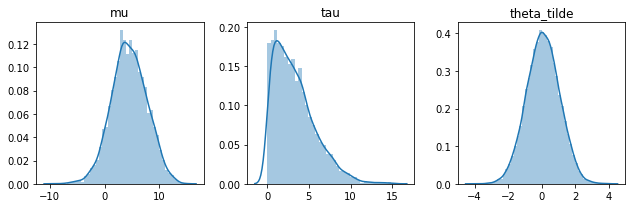

In [7]:
f, axes = plt.subplots(1, 3, figsize=(9,3))
for param, name, ax in zip(trace, ["mu", "tau", "theta_tilde"], axes):
    sns.distplot(sampling.merge_chains(param).flatten(),ax=ax)
    ax.set_title(name)
plt.tight_layout()